<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Brg1_KD_D7_open_closed_enriched_heatmap_and_annotating_peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Brg1 KD ATAC-seq data at D7

by Wuming Gong



In [1]:
start_time0 <- Sys.time()

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages

In [6]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
required_packages <- c(
  'devtools', 'gplots', 'circlize', 'dplyr',
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'rtracklayer', 'EnrichedHeatmap', 'ChIPpeakAnno', 'ChIPseeker', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'ComplexHeatmap',
  'org.Mm.eg.db', 'clusterProfiler', 'ReactomePA',
  'gsl', 'DirichletMultinomial', 'chromVAR', 'motifmatchr' # chromVAR related packages
)
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'gplots', 'circlize',
  'SummarizedExperiment', 'BSgenome.Mmusculus.UCSC.mm10', 'BiocParallel',
  'rtracklayer', 'EnrichedHeatmap', 'ChIPpeakAnno', 'ChIPseeker',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'ComplexHeatmap', 'org.Mm.eg.db',
  'clusterProfiler', 'ReactomePA', 'gsl', 'DirichletMultinomial', 'chromVAR',
  'motifmatchr'

also installing the dependencies ‘gridGraphics’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘formatR’, ‘plogr’, ‘filelock’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘ape’, ‘tidytree’, ‘treeio’, ‘gridExtra’, ‘fastmatch’, ‘tweenr’, ‘polyclip’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘sass’, ‘bitops’, ‘GenomeInfoDbData’, ‘lambda.r’, ‘futile.options’, ‘Rhtslib’, ‘rjson’, ‘RSQLite’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘Bi

### Install `chromVARmotifs` package required for `chromVAR`

In [8]:
devtools::install_github("GreenleafLab/chromVARmotifs")

glue    (1.5.0  -> 1.5.1 ) [CRAN]
memoise (2.0.0  -> 2.0.1 ) [CRAN]
stringi (1.7.5  -> 1.7.6 ) [CRAN]
openssl (1.4.3  -> 1.4.5 ) [CRAN]
cpp11   (0.4.1  -> 0.4.2 ) [CRAN]
vroom   (1.5.6  -> 1.5.7 ) [CRAN]
withr   (2.4.2  -> 2.4.3 ) [CRAN]
digest  (0.6.28 -> 0.6.29) [CRAN]
readr   (2.1.0  -> 2.1.1 ) [CRAN]


Skipping 28 packages ahead of CRAN: zlibbioc, IRanges, S4Vectors, BiocGenerics, DelayedArray, Biobase, MatrixGenerics, Rhtslib, BiocParallel, SummarizedExperiment, GenomeInfoDbData, BiocIO, GenomicAlignments, Rsamtools, Biostrings, GenomeInfoDb, XVector, GenomicRanges, AnnotationDbi, KEGGREST, GO.db, annotate, rtracklayer, seqLogo, DirichletMultinomial, CNEr, BSgenome, TFBSTools

Installing 9 packages: glue, memoise, stringi, openssl, cpp11, vroom, withr, digest, readr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpuJI3W6/remotes4a7eff54ce/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Load R packages

In [9]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(BiocParallel)
register(MulticoreParam(2))
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(dplyr)
library(ComplexHeatmap)
library(EnrichedHeatmap)
library(rtracklayer)
library(parallel)
library(ChIPpeakAnno)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(clusterProfiler)
library(ReactomePA)



Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

Loadin

## Get sustained Etv2 ChIP-seq peaks
Split the Etv2 MEF D1 peaks into three groups
* on at D1 and off at D7 (early)
* off at D1 and on at D7 (late)
* on at both D1 and D7 (sustained)

In [12]:
gr_url <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/all_Etv2_peaks.rds' 
gr <- readRDS(gzcon(url(gr_url)))
peaks <- gr[gr$group[, 'MEF_Dox_d1_Etv2'] | gr$group[, 'MEF_Dox_d7_Etv2']]
peaks

GRanges object with 127559 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3037784-3037983      * | /panfs/roc/scratch/g..  16.22768
       [2]     chr1   3490314-3490513      * | /panfs/roc/scratch/g..  12.29730
       [3]     chr1   3531626-3531825      * | /panfs/roc/scratch/g..  16.22768
       [4]     chr1   3671125-3671324      * | /panfs/roc/scratch/g..   6.73792
       [5]     chr1   3671746-3671945      * | /panfs/roc/scratch/g..   9.54304
       ...      ...               ...    ... .                    ...       ...
  [127555]     chrY 90828936-90829135      * | /panfs/roc/scratch/g.. 160.15463
  [127556]     chrY 90836259-90836458      * | /panfs/roc/scratch/g..   8.27339
  [127557]     chrY 90841624-90841823      * | /panfs/roc/scratch/g..   1.53792
  [127558]     chrY 90842563-90842762      * | /panfs/roc/scra

Select the sustained Etv2 ChIP-seq peaks that are present in both D1 and D7 post induction.

In [13]:
is_sustained <- peaks$group[, 'MEF_Dox_d1_Etv2'] & peaks$group[, 'MEF_Dox_d7_Etv2']
peaks_sustained <- peaks[is_sustained]
cat(sprintf('# of sustained Etv2 ChIP-seq peaks: %d', sum(is_sustained)))

# of sustained Etv2 ChIP-seq peaks: 12170

## Download MACS2 pileup files of ATAC-seq

In [14]:
bw_files <- c(
  'MEF_Dox_D1_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_FE.bw',
#  'MEF_Dox_D2_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_FE.bw',
  'MEF_Dox_D7_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Etv2_FE.bw',
#  'MEF_NoDox_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_NoDox_d0_Brg1_FE.bw',
#  'MEF_Dox_D1_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Brg1_FE.bw',
#  'MEF_Dox_D2_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Brg1_FE.bw',
#  'MEF_Dox_D7_Brg1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Brg1_FE.bw',
  'MEF_Brg1_KD_D0' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_D0_treat_pileup.bw',
#  'MEF_Brg1_KD_Dox_D1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_Dox_D1_treat_pileup.bw',
#  'MEF_Brg1_KD_Dox_D2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_Dox_D2_treat_pileup.bw',
  'MEF_Brg1_KD_Dox_D7' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_Dox_D7_treat_pileup.bw',
#  'MEF_Brg1_KD_NoDox_D1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_NoDox_D1_treat_pileup.bw',
#  'MEF_Brg1_KD_NoDox_D2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_NoDox_D2_treat_pileup.bw',
#  'MEF_Brg1_KD_NoDox_D7' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_NoDox_D7_treat_pileup.bw',
#  'MEF_Dox_D1' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D1_treat_pileup.bw',
#  'MEF_Dox_D2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D2_treat_pileup.bw',
  'MEF_Dox_D7' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_treat_pileup.bw',
  'MEF_Dox_D7_Flk1pos' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos_treat_pileup.bw',
  'MEF_NoDox' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox_treat_pileup.bw',
  'MNase' =	'https://s3.msi.umn.edu/gongx030/datasets/dataset=Chronis_version=20170519a/MNase_treat_pileup.bw'
)

Download MACS2 pileup files (in BigWig format)
It appears that `rtracklayer::import` does not support importing bigwig files with URL starting with 'https://'.  We need to download the bigwig files first.


In [15]:
local_bw_files <- gsub('https://s3.msi.umn.edu/', './', bw_files)
commands <- sprintf('wget -x -c -nH %s', bw_files)
res <- lapply(commands, function(command) system(command))
stopifnot(all(file.exists(local_bw_files)))

## Read the ATAC-seq summits

In [16]:
# ATAC-seq summits of Brg1 KD at D7 post Etv2 induction
bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Brg1KO_MEF_reprogramming_version=20200817a/MEF_Brg1_KD_Dox_D7_summits.bed'
peaks_Brg1KD_D7 <- read.table(bed_file, header = FALSE, sep = '\t')
peaks_Brg1KD_D7 <- GRanges(seqnames = peaks_Brg1KD_D7[, 1], range = IRanges(peaks_Brg1KD_D7[, 2], peaks_Brg1KD_D7[, 3]))

# ATAC-seq summits WT MEF reprogramming at D7 post Etv2 induction
bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos_summits.bed'
peaks_D7_Flk1pos <- read.table(bed_file, header = FALSE, sep = '\t')
peaks_D7_Flk1pos <- GRanges(seqnames = peaks_D7_Flk1pos[, 1], range = IRanges(peaks_D7_Flk1pos[, 2], peaks_D7_Flk1pos[, 3]))

# ATAC-seq summits WT MEF reprogramming at D7 post Etv2 induction
bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_summits.bed'
peaks_D7 <- read.table(bed_file, header = FALSE, sep = '\t')
peaks_D7 <- GRanges(seqnames = peaks_D7[, 1], range = IRanges(peaks_D7[, 2], peaks_D7[, 3]))

# ATAC-seq summits WT MEF reprogramming at MEF (D0)
bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox_summits.bed'
peaks_NoDox <- read.table(bed_file, header = FALSE, sep = '\t')
peaks_NoDox <- GRanges(seqnames = peaks_NoDox[, 1], range = IRanges(peaks_NoDox[, 2], peaks_NoDox[, 3]))

# ATAC-seq blacklist
bed_file <- 'https://s3.msi.umn.edu/gongx030/datasets/datasets=blacklists_version=20190827a/mm10.blacklist.bed.gz'
peaks_blacklist <- gzcon(url(bed_file))
peaks_blacklist <- readLines(peaks_blacklist)
peaks_blacklist <- read.table(textConnection(peaks_blacklist), header = FALSE, sep = '\t')
peaks_blacklist <- GRanges(seqnames = peaks_blacklist[, 1], range = IRanges(peaks_blacklist[, 2], peaks_blacklist[, 3]))

## get_normalizeToMatrix
Generate the normalizeToMatrix object for visualizing ChIP-seq-like data by `EnrichedHeatmap`. 

In [17]:
extend <- 1000
w <- 50
smooth <- FALSE
target_ratio <- 0.2
mc.cores <- 2
target_width <- width(peaks)[1]
cat(sprintf('# peaks: %d\n', length(peaks)))
cat(sprintf('target width: %d\n', target_width))

# peaks: 127559
target width: 200


In [18]:
get_normalizeToMatrix <- function(bw_file, peaks, extend, w, smooth = FALSE, target_ratio = 0.2, ...){
  cvg <- rtracklayer::import(bw_file, which = trim(GenomicRanges::reduce(resize(peaks, fix = 'center', width = target_width + extend * 2))))  # returned as a GRanges object
  mat <- normalizeToMatrix(cvg, peaks, extend = extend, value_column = 'score', mean_mode = 'w0', w = w, smooth = smooth, target_ratio = target_ratio, ...)
  mat
} # get_normalizeToMatrix

## Prepare normalized matrix for EnrichedHeatmap

In [19]:
mat <- mclapply(local_bw_files, function(bw_file){
  cvg <- rtracklayer::import(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(peaks, fix = 'center', width = target_width + extend * 2)))
  )  # returned as a GRanges object
  normalizeToMatrix(
    cvg, 
    peaks, 
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = w, 
    smooth = smooth, 
    target_ratio = target_ratio
  )
}, mc.cores = 2)

## Make the heatmap

Color scheme of the heatmap

In [40]:
group_cols <- c(
  'MEF_Dox_D1_Etv2' = 'red',
  'MEF_Dox_D2_Etv2' = 'red',
  'MEF_Dox_D7_Etv2' = 'red',
  'MEF_NoDox_Brg1' = 'purple',
  'MEF_Dox_D1_Brg1' = 'purple',
  'MEF_Dox_D2_Brg1' = 'purple',
  'MEF_Dox_D7_Brg1' = 'purple',
  'MEF_Brg1_KD_D0' = 'blue',
  'MEF_Brg1_KD_Dox_D1' = 'blue',
  'MEF_Brg1_KD_Dox_D2' = 'blue',
  'MEF_Brg1_KD_Dox_D7' = 'blue',
  'MEF_Brg1_KD_NoDox_D1' = 'blue',
  'MEF_Brg1_KD_NoDox_D2' = 'blue',
  'MEF_Brg1_KD_NoDox_D7' = 'blue',
  'MEF_Dox_D1' = 'blue',
  'MEF_Dox_D2' = 'blue',
  'MEF_Dox_D7' = 'blue',
  'MEF_Dox_D7_Flk1pos' = 'blue',
  'MEF_NoDox' = 'blue',
  'MNase' = 'green'
)
col_fun <- lapply(names(bw_files), function(i) colorRamp2(quantile(mat[[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(bw_files)

In [100]:
peaks_Brg1KD_D7

GRanges object with 13763 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1   3236070-3236071      *
      [2]     chr1   3307368-3307369      *
      [3]     chr1   3307721-3307722      *
      [4]     chr1   3613587-3613588      *
      [5]     chr1   4247440-4247441      *
      ...      ...               ...    ...
  [13759]     chrY 90803622-90803623      *
  [13760]     chrY 90804558-90804559      *
  [13761]     chrY 90805075-90805076      *
  [13762]     chrY 90811719-90811720      *
  [13763]     chrY 90812361-90812362      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [39]:
open_Brg1KD_D7 <- peaks %over% peaks_Brg1KD_D7
open_D7_Flk1pos <- peaks %over% peaks_D7_Flk1pos
open_D7 <- peaks %over% peaks_D7
is_black <- peaks %over% peaks_blacklist
is_Etv2_bound_D1 <- peaks$group[, 'MEF_Dox_d1_Etv2']
is_Etv2_bound_D7 <- peaks$group[, 'MEF_Dox_d7_Etv2']
is_valid <- rowMeans(mat[['MEF_NoDox']]) < 50
is_closed_in_MEF <- enriched_score(mat[['MEF_NoDox']]) < 1000
is_closed_in_Brg1_KD_D0 <- enriched_score(mat[['MEF_Brg1_KD_D0']]) < 1000
mnase_score <- enriched_score(mat[['MNase']])
is_NOR <- mnase_score > quantile(mnase_score, 0.75)
is_NFR <- mnase_score < quantile(mnase_score, 0.25)
NOR_NFR <- cut(mnase_score, quantile(mnase_score, c(0, 0.25, 0.75, 1)), include.lowest = TRUE)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FA

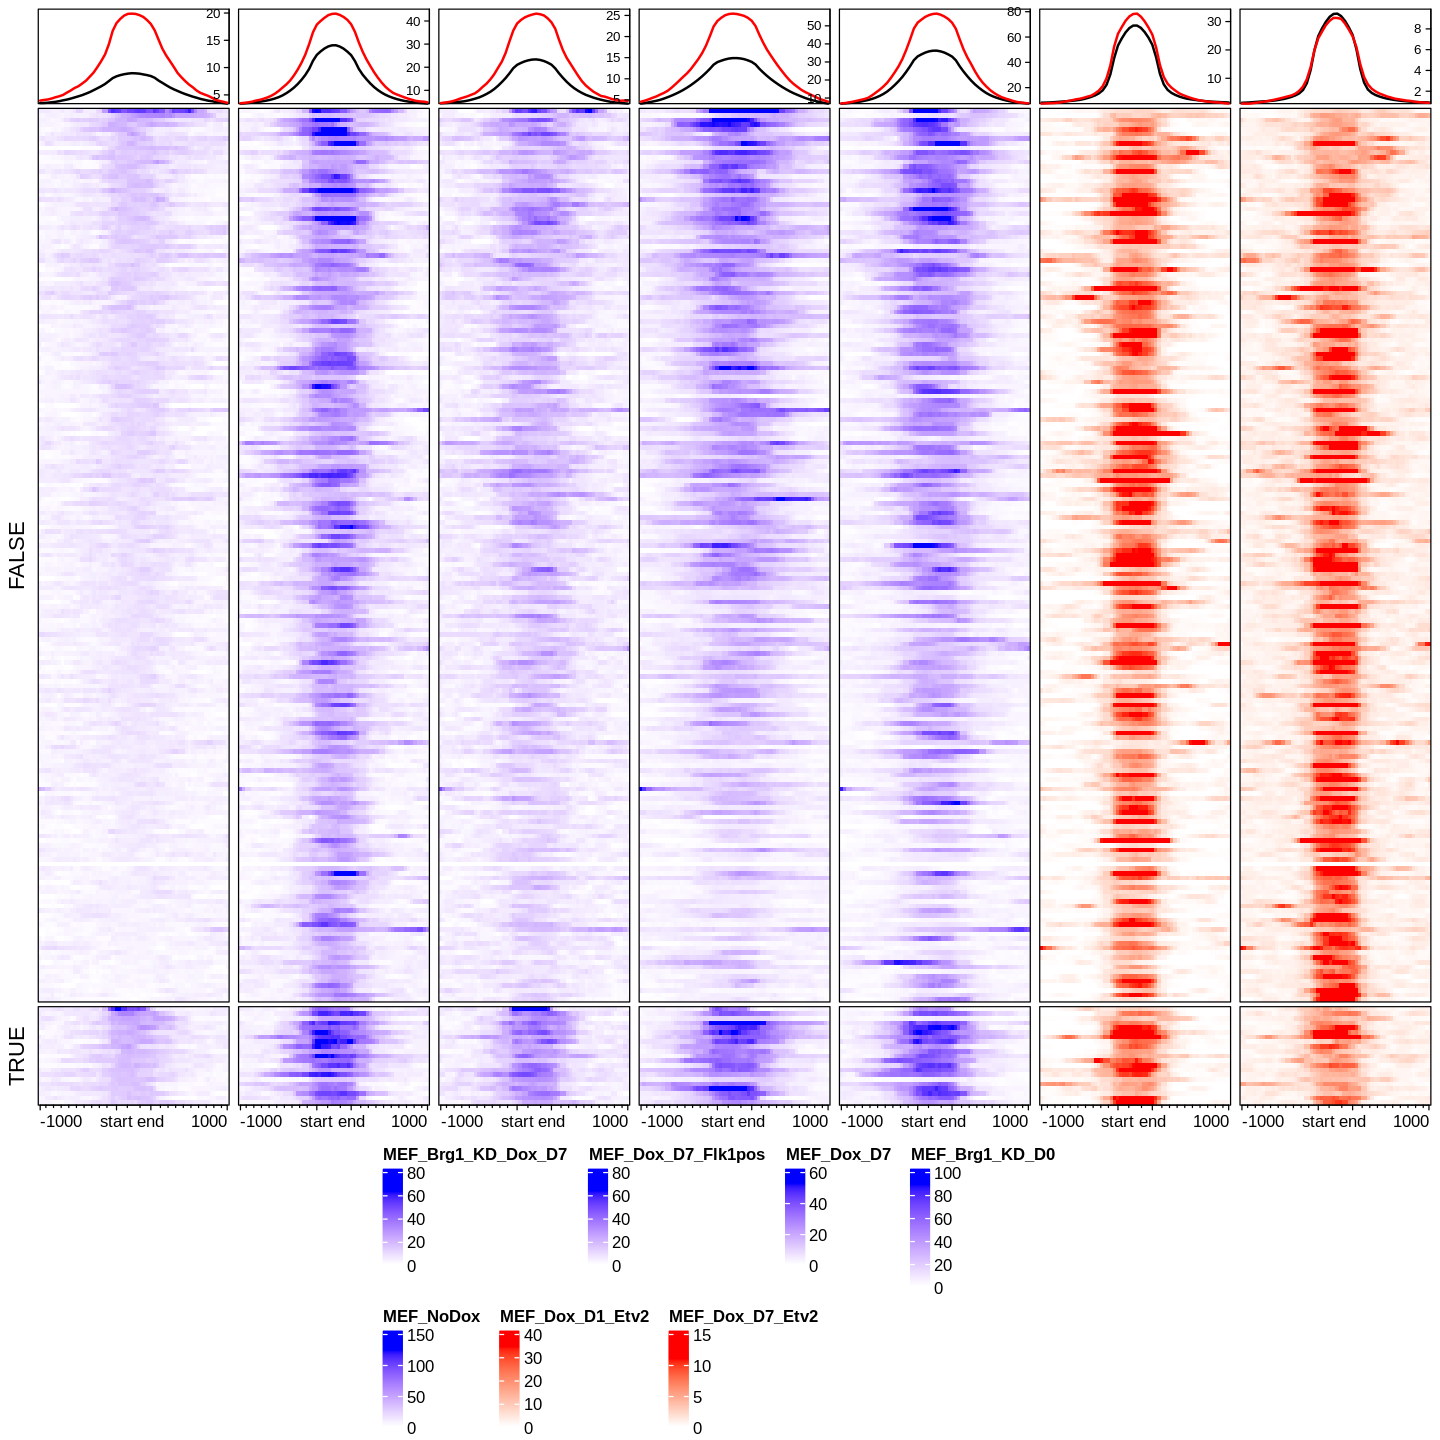

In [106]:
i <- which(open_D7_Flk1pos & !is_black & is_Etv2_bound_D1 & is_Etv2_bound_D7 & is_valid)
sp <- factor(open_Brg1KD_D7)
          
ta <- HeatmapAnnotation(
  enriched = anno_enriched( 
   gp = gpar(lty = 1, lwd = 2, col = c('black','red')),
    axis_param = list(facing = 'inside')
  )
)
h <- EnrichedHeatmap(
  mat[['MEF_Brg1_KD_Dox_D7']][i, ], 
  col = col_fun[['MEF_Brg1_KD_Dox_D7']], 
  row_order = order(enriched_score(mat[['MEF_Brg1_KD_Dox_D7']][i, ]), decreasing = TRUE),
  split = sp[i], 

  name = 'MEF_Brg1_KD_Dox_D7', 
  top_annotation = ta, 
  pos_line = FALSE
)
ss <- c(
  'MEF_Dox_D7_Flk1pos','MEF_Dox_D7',
  'MEF_Brg1_KD_D0', 'MEF_NoDox',
  'MEF_Dox_D1_Etv2', 'MEF_Dox_D7_Etv2'
)
for (s in ss[ss %in% names(bw_files)]){
  h <- h + EnrichedHeatmap(mat[[s]][i, ], col = col_fun[[s]], name = s, top_annotation = ta, pos_line = FALSE)
}
options(repr.plot.width = 12, repr.plot.height = 12)
draw(h, heatmap_legend_side = 'bottom', split = sp[i])

# Annotating open and closed Etv2 peaks at day 7in Brg1 KD MEFs

In [79]:
peaks_anno <- list(peaks[which(open_Brg1KD_D7 & open_D7_Flk1pos & !is_black & is_Etv2_bound_D1 & is_Etv2_bound_D7 & is_valid)], peaks[which(!open_Brg1KD_D7 & open_D7_Flk1pos & !is_black & is_Etv2_bound_D1 & is_Etv2_bound_D7 & is_valid)])

In [80]:
names(peaks_anno) <- c('Open', 'Closed')

In [87]:
set.seed(1234)
anno_list <- lapply(peaks_anno, function(p)
  annotatePeak(p, tssRegion = c(-3000, 3000), TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene, annoDb = "org.Mm.eg.db")
)

>> preparing features information...		 2021-12-04 12:19:14 AM 
>> identifying nearest features...		 2021-12-04 12:19:14 AM 
>> calculating distance from peak to TSS...	 2021-12-04 12:19:15 AM 
>> assigning genomic annotation...		 2021-12-04 12:19:15 AM 
>> adding gene annotation...			 2021-12-04 12:19:18 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-12-04 12:19:18 AM 
>> done...					 2021-12-04 12:19:18 AM 
>> preparing features information...		 2021-12-04 12:19:18 AM 
>> identifying nearest features...		 2021-12-04 12:19:18 AM 
>> calculating distance from peak to TSS...	 2021-12-04 12:19:18 AM 
>> assigning genomic annotation...		 2021-12-04 12:19:18 AM 
>> adding gene annotation...			 2021-12-04 12:19:23 AM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-12-04 12:19:23 AM 
>> done...					 2021-12-04 12:19:23 AM 


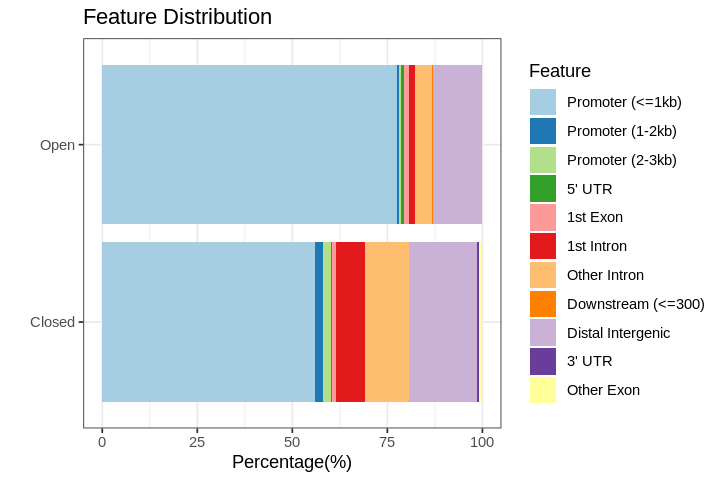

In [92]:
options(repr.plot.width=6, repr.plot.height=4)
plotAnnoBar(anno_list)

## SessionInfo

In [ ]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ReactomePA_1.34.0                        
 [2] clusterProfiler_3.18.0                   
 [3] org.Mm.eg.db_3.12.0                      
 [4] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [5] GenomicFeatures_1.42.1                   

In [ ]:
Sys.time() - start_time0

Time difference of 53.3129 mins